In [1]:
import pandas as pd  # all imports should be here
import numpy as np
import matplotlib.pyplot as plt

In [138]:
data1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=0',index_col=0,)
data2 = pd.read_csv('https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=2076733987',index_col=0,)

# reading data from google doc spreadsheet 
# link for july datasheet below 
# https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=0
# link for august datasheet below
# https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=2076733987

data = data2
#data = pd.concat([data1, data2])

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 12 columns):
id                 357 non-null int64
Task               357 non-null object
Module             357 non-null object
Type               357 non-null object
Student            357 non-null object
Late Submission    357 non-null int64
Points             357 non-null float64
Total              357 non-null int64
Task Winner        357 non-null int64
Date_day           357 non-null int64
Date_month         357 non-null int64
Date_year          357 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 46.3+ KB


### Cleaning data set

In [140]:
data["Student"].fillna("Swaastik",inplace=True)  # few empty blocks is actually me
data["Student"].replace("Swaastik","Swaastick",inplace=True)  

mask=data["Student"]!="Nitish"                   # removing sir
data=data[mask]

In [141]:
data.reset_index(inplace=True)  # giving index to data set
#data.drop([0],inplace=True)     # the first row contains nothing so removing it
data.dropna(inplace=True)
data=data.iloc[:,:10]           # Removing all unnessary columns after Task Winner if any

C:\Users\Swastik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
data # cleaner data-set

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,0,AjKyaUkhada,2019-08-01 13:26:57,Ritual,Consistency,Sonali,0,2.0,2,0
1,0,AjKyaUkhada,2019-08-01 14:40:42,Ritual,Consistency,Chandrima,0,2.0,2,0
2,0,AjKyaUkhada,2019-08-01 14:44:34,Ritual,Consistency,Purbita,0,2.0,2,0
3,0,AjKyaUkhada,2019-08-01 14:47:05,Ritual,Consistency,Kunal,0,2.0,2,0
4,0,AjKyaUkhada,2019-08-01 14:48:11,Ritual,Consistency,Kaushal,0,2.0,2,0
5,0,AjKyaUkhada,2019-08-01 15:05:13,Ritual,Consistency,Durga,0,2.0,2,0
6,0,AjKyaUkhada,2019-08-01 15:55:48,Ritual,Consistency,Ujjainee,0,2.0,2,0
7,0,AjKyaUkhada,2019-08-01 16:08:05,Ritual,Consistency,Dipam,0,2.0,2,0
8,0,AjKyaUkhada,2019-08-01 16:16:30,Ritual,Consistency,Siddhishikha,0,2.0,2,0
9,0,AjKyaUkhada,2019-08-01 16:17:01,Ritual,Consistency,Surabhi,0,2.0,2,0


#### cleaning date

In [143]:
date_day=[]
date_month=[]
date_year=[]

for i in range(data.shape[0]):
    
    pos=data["Date"][i].find("/")
    
    if(len(data["Date"][i])>=18):                     # 2019-08-01 14:40:42
        #data["Date"][i]=data["Date"][i][:10]
        date_day.append(int(data["Date"][i][8:10]))
        date_month.append(int(data["Date"][i][5:7]))
        date_year.append(int(data["Date"][i][:4]))
        
    if(len(data["Date"][i])<18):  
        
        if( (int(data["Date"][i][pos+1:-5]))>12 or ( (len(data["Date"][i][pos+1:-5])==2) and (data["Date"][i][pos+1:-5][0]=="0") )  ):    # 14/08/2019
            pos=data["Date"][i].find("/")
            date_day.append(int(data["Date"][i][:pos]))
            date_month.append(int(data["Date"][i][pos+1:-5]))
            date_year.append(int(data["Date"][i][-4:]))
        
        else:
            pos=data["Date"][i].find("/")                     # 8/1/2019
            date_month.append(int(data["Date"][i][:pos]))
            date_day.append(int(data["Date"][i][pos+1:-5]))
            date_year.append(int(data["Date"][i][-4:]))   

data["Date_day"]=date_day
data["Date_month"]=date_month
data["Date_year"]=date_year

In [144]:
data.drop(columns=["Date"],inplace=True)

In [185]:
data["Type"].value_counts()

Consistency                                   233
Consistency,Curiosity                          38
Diligence                                      20
Creativity,Intent,sincerity                    18
Creativity,Communication,Intent,Confidence     17
Sincerity,Hard-work                            16
Creativity, Intent                             15
Name: Type, dtype: int64

### Analysis Starts here

Student
Surabhi         116.5
Chandrima       105.0
Ujjainee        104.5
Dipam           102.0
Shakib           99.0
Purbita          98.5
Vishal           95.0
Sonali           89.5
Kunal            85.5
Sharika          79.5
Apurwa           79.0
Durga            78.0
Kaushal          77.5
Swaastick        73.0
Roumyak          70.0
Prasoon          66.0
Siddhishikha     65.5
Arya             64.5
Shantanu         57.0
Anjali            5.0
Bhavna            5.0
Wrick             2.0
Name: Points, dtype: float64

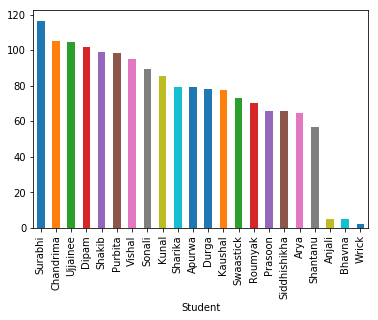

In [118]:
data_topper = data.groupby("Student")["Points"].sum().sort_values(ascending=False)
data_topper.plot("bar")
data_topper


In [146]:
student_name="Swaastick"

In [181]:
#mask=data["Task"]=="AjKyaUkhada"
#df=data[mask]
mask=data["Student"]=="Swaastick"
df=data[mask]

df.reset_index(drop=True,inplace=True)

Points_cum=[]
sum_cum=0
for i in df["Points"]:
    sum_cum=sum_cum + i
    Points_cum.append(sum_cum)

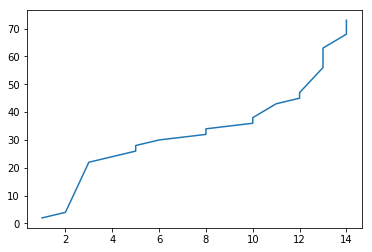

In [186]:
plt.plot(df["Date_day"],Points_cum)